In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-providers-data/Healthcare Providers.csv


In [2]:
# Milestone 1 — Setup & Load
import pandas as pd
import numpy as np

from IPython.display import display

# Set your path (note the space in file name is fine)
# Adjust the path to match Kaggle's input directory
PATH = "/kaggle/input/healthcare-providers-data/Healthcare Providers.csv"

# Read CSV (low_memory=False avoids dtype guessing issues on large CSVs)
df = pd.read_csv(PATH, low_memory=False)

print("Shape (rows, cols):", df.shape)
print("\nColumn names:")
print(list(df.columns))

print("\nFirst 5 rows:")
display(df.head(5))

Shape (rows, cols): (100000, 27)

Column names:
['index', 'National Provider Identifier', 'Last Name/Organization Name of the Provider', 'First Name of the Provider', 'Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'Street Address 1 of the Provider', 'Street Address 2 of the Provider', 'City of the Provider', 'Zip Code of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

First 5 rows:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-providers-data/Healthcare Providers.csv


In [4]:
# Milestone 2 — Quick EDA

# Info about data types and missing values
df.info()

print("\nSummary stats for numeric columns:")
display(df.describe())

print("\nCount of missing values per column:")
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08



Count of missing values per column:


index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [5]:
# Milestone 3 — Preprocessing Step 1

# Columns we will keep (service + financial columns)
num_cols = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]

# Extract only those
df_num = df[num_cols].copy()

print("Before conversion:")
print(df_num.dtypes)
display(df_num.head(5))


Before conversion:
Number of Services                                          object
Number of Medicare Beneficiaries                            object
Number of Distinct Medicare Beneficiary/Per Day Services    object
Average Medicare Allowed Amount                             object
Average Submitted Charge Amount                             object
Average Medicare Payment Amount                             object
Average Medicare Standardized Amount                        object
dtype: object


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,175,175,175,123.73,548.8,118.83,135.31525714
2,32,13,32,90.65,155,64.4396875,60.5959375
3,20,18,20,3.5,5,3.43,3.43
4,33,24,31,26.52,40,19.539393939,19.057575758


In [6]:
# Milestone 3 — Preprocessing Step 2
# Goal: Clean text numbers (like "$1,234.56") → real numbers (float)

def clean_numeric(series):
    """
    Takes a pandas Series (column) that looks like numbers but is stored as text.
    - Removes dollar signs ($), commas, and spaces
    - Converts to float
    """
    return (
        series.astype(str)             # make sure everything is string
        .str.replace(r'[\$,]', '', regex=True)  # remove $ and ,
        .replace("nan", np.nan)        # handle "nan" strings
        .astype(float)                 # convert to float
    )

# Apply cleaning to all numeric columns
for col in df_num.columns:
    df_num[col] = clean_numeric(df_num[col])

print("After conversion:")
print(df_num.dtypes)

# Quick peek at the numbers
display(df_num.head(5))

# Check missing values after conversion
print("\nMissing values per column:")
print(df_num.isnull().sum())


After conversion:
Number of Services                                          float64
Number of Medicare Beneficiaries                            float64
Number of Distinct Medicare Beneficiary/Per Day Services    float64
Average Medicare Allowed Amount                             float64
Average Submitted Charge Amount                             float64
Average Medicare Payment Amount                             float64
Average Medicare Standardized Amount                        float64
dtype: object


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576



Missing values per column:
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


In [7]:
# Milestone 3 — Preprocessing Step 3
from sklearn.preprocessing import StandardScaler

# 1) Fill missing values with column median
df_num_filled = df_num.fillna(df_num.median())

# 2) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num_filled)

print("Shape after scaling:", X_scaled.shape)
print("First 5 rows (scaled features):\n", X_scaled[:5])


Shape after scaling: (100000, 7)
First 5 rows (scaled features):
 [[-0.08530146 -0.05930843 -0.07018311  0.38544957 -0.04643253  0.40008162
   0.41429889]
 [-0.02593939  0.07677525  0.02004874  0.08667282  0.18280539  0.207649
   0.28635917]
 [-0.08329598 -0.06922181 -0.06713474 -0.0419223  -0.18779399 -0.06468681
  -0.0871544 ]
 [-0.08810912 -0.06471573 -0.07445084 -0.38070901 -0.32895678 -0.37016625
  -0.37292057]
 [-0.08289489 -0.05930843 -0.06774442 -0.29122112 -0.2960188  -0.28950548
  -0.29480006]]


In [8]:
# Milestone 4 — Train Isolation Forest
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
# n_estimators = number of trees, contamination = expected fraction of anomalies (we guess ~5%)
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit model on scaled data
iso.fit(X_scaled)

# Predict anomalies
# -1 = anomaly, 1 = normal
labels = iso.predict(X_scaled)

# Anomaly scores (lower = more abnormal)
scores = iso.decision_function(X_scaled)

# Attach results back to dataframe
df_results = df.copy()   # keep original info
df_results["Anomaly_Label"] = labels
df_results["Anomaly_Score"] = scores

print("Counts of anomalies vs normals:")
print(df_results["Anomaly_Label"].value_counts())

# Show first 10 anomalies
display(df_results[df_results["Anomaly_Label"] == -1].head(10))


Counts of anomalies vs normals:
Anomaly_Label
 1    95000
-1     5000
Name: count, dtype: int64


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Anomaly_Label,Anomaly_Score
72,2966570,1306040902,YANCI TORRES,MARTHA,C,MD,F,I,1701 3RD ST SE,SUITE 201,...,N,42,40,42,667.01,"5,421",517.96928571,515,-1,-0.122713
116,7267109,1730355595,FORT MYERS ENDOSCOPY CENTER LLC,NaN,NaN,NaN,NaN,O,5050 MASON CORBIN CT,NaN,...,N,11,11,11,460.35,"1,585",347.86727273,358.97727273,-1,-0.025767
120,3394842,1346284098,GEMMA,NICHOLAS,W,M.D.,M,I,400 CAMPUS BLVD STE 100,NaN,...,Y,"15,000",12,20,1.0603,3.9,0.82999,0.82999,-1,-0.066384
122,5529821,1568417137,COLIZZA,WAYNE,A,MD,M,I,160 E HANOVER AVE,NaN,...,N,31,31,31,"1,529.4","8,700","1,522.4780645","1,071.2541935",-1,-0.245830
175,2798662,1285660183,VAN RAALTE,HEATHER,M,M.D.,F,I,10 FORRESTAL RD S,SUITE 205,...,N,17,17,17,999.84823529,"2,144",727.91470588,746.78,-1,-0.138410
195,3226792,1326208455,SAHNI,VAIBHAV,NaN,M.D.,M,I,G1071 N BALLENGER HWY,SUITE 310,...,N,713,92,713,279.72,709.2454418,206.57820477,221.71326788,-1,-0.015248
221,8644521,1871747469,MUMERT,MICHAEL,L,M.D.,M,I,3801 S NATIONAL AVE,"WEST TOWER, SUITE 700",...,N,13,13,13,"1,686.6946154","6,785.66","1,230.8507692","1,430.1630769",-1,-0.231553
223,2571862,1265419634,SCHRAM,ADRIANN,S,MD,F,I,483 CRANBURY RD,UNIVERSITY RADIOLOGY GROUP PC,...,N,18,18,18,767.87111111,"2,350",594.03944444,513.15,-1,-0.093641
255,8953292,1902942931,NWOSU,AGODICHI,U,MD,M,I,3613B RAEFORD RD,NaN,...,N,101,100,101,449.67,"1,200",344.12722772,387.45326733,-1,-0.047032
263,1512086,1154387827,KMONICEK,JOSEPH,M,MD,M,I,877 W FARIS RD,STE B,...,N,49,39,39,509.43938776,"1,931",392.31795918,433.6244898,-1,-0.055754


In [9]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(X_scaled)        # -1 = anomaly, 1 = normal
lof_scores  = -lof.negative_outlier_factor_   # higher = more abnormal

df_results["LOF_Label"]  = lof_labels
df_results["LOF_Score"]  = lof_scores
print("LOF anomalies:", (lof_labels == -1).sum())

LOF anomalies: 5000


In [10]:
# One-Class SVM (boundary-based)
from sklearn.svm import OneClassSVM
svm = OneClassSVM(nu=0.05, kernel="rbf", gamma="scale")
svm_labels = svm.fit_predict(X_scaled)
print("OCSVM anomalies:", (svm_labels == -1).sum())

OCSVM anomalies: 4999


In [11]:
# 1) store
df_results["OCSVM_Label"] = svm_labels

# 2) tiny comparison
compare = pd.DataFrame({
    "IF":  labels,
    "LOF": lof_labels,
    "OCSVM": svm_labels
}).replace({1:"normal", -1:"anomaly"})

print("Overlap counts:")
print(compare.apply(pd.Series.value_counts))

Overlap counts:
            IF    LOF  OCSVM
normal   95000  95000  95001
anomaly   5000   5000   4999


In [12]:
# Re-run these two cells (or put them in one cell and run once)
PATH = "/kaggle/input/healthcare-providers-data/Healthcare Providers.csv"
df = pd.read_csv(PATH, low_memory=False)

num_cols = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]

df_num = df[num_cols].copy()
for col in df_num.columns:
    df_num[col] = (
        df_num[col].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace("nan", np.nan)
        .astype(float)
    )

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num.fillna(df_num.median()))

iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso.fit(X_scaled)
labels = iso.predict(X_scaled)
scores = iso.decision_function(X_scaled)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(X_scaled)
lof_scores = -lof.negative_outlier_factor_

df_results = df.copy()
df_results["Anomaly_Label"] = labels
df_results["Anomaly_Score"] = scores
df_results["LOF_Label"] = lof_labels
df_results["LOF_Score"] = lof_scores

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


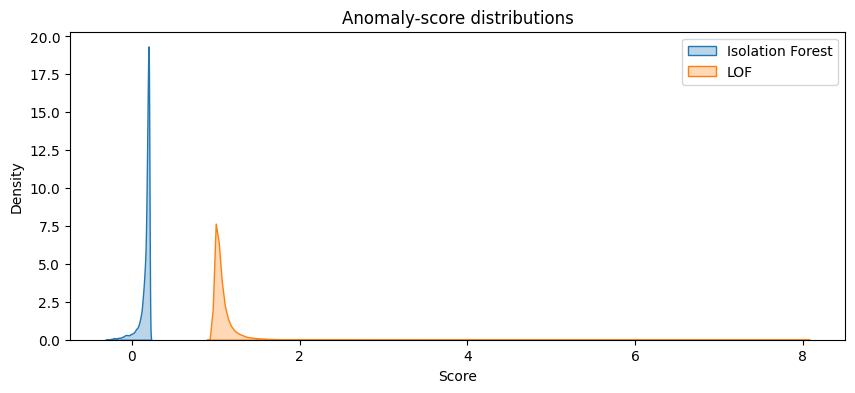

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.kdeplot(df_results["Anomaly_Score"], label="Isolation Forest", fill=True, alpha=.3)
sns.kdeplot(df_results["LOF_Score"], label="LOF", fill=True, alpha=.3)
# OCSVM does not expose a signed distance in the same way, so skip or use abs
plt.title("Anomaly-score distributions")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

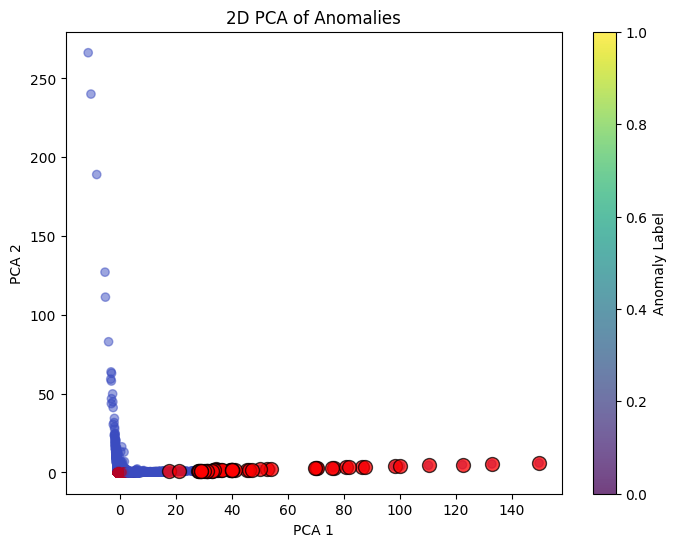

In [14]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Sort by anomaly score and pick the top N
N = 50  # or any number we prefer
top_anomalies = X_pca[scores.argsort()[:N]]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_results["Anomaly_Label"], cmap='coolwarm', alpha=0.5)
plt.scatter(top_anomalies[:, 0], top_anomalies[:, 1], c='red', s=100, edgecolor='k', alpha=0.75)  # Top N anomalies in red
plt.title("2D PCA of Anomalies")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Anomaly Label")
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Load data
PATH = "/kaggle/input/healthcare-providers-data/Healthcare Providers.csv"
df = pd.read_csv(PATH, low_memory=False)

# Preprocessing
num_cols = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]

df_num = df[num_cols].copy()
for col in df_num.columns:
    df_num[col] = (
        df_num[col].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace("nan", np.nan)
        .astype(float)
    )

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num.fillna(df_num.median()))

# Initialize and fit Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso.fit(X_scaled)
iso_labels = iso.predict(X_scaled)
iso_scores = iso.decision_function(X_scaled)

# Initialize and fit LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(X_scaled)
lof_scores = -lof.negative_outlier_factor_

# Initialize and fit OCSVM
svm = OneClassSVM(nu=0.05, kernel="rbf", gamma="scale")
svm_labels = svm.fit_predict(X_scaled)

# Attach results back to dataframe
df_results = df.copy()
df_results["Anomaly_Label"] = iso_labels
df_results["Anomaly_Score"] = iso_scores
df_results["LOF_Label"] = lof_labels
df_results["LOF_Score"] = lof_scores
df_results["OCSVM_Label"] = svm_labels

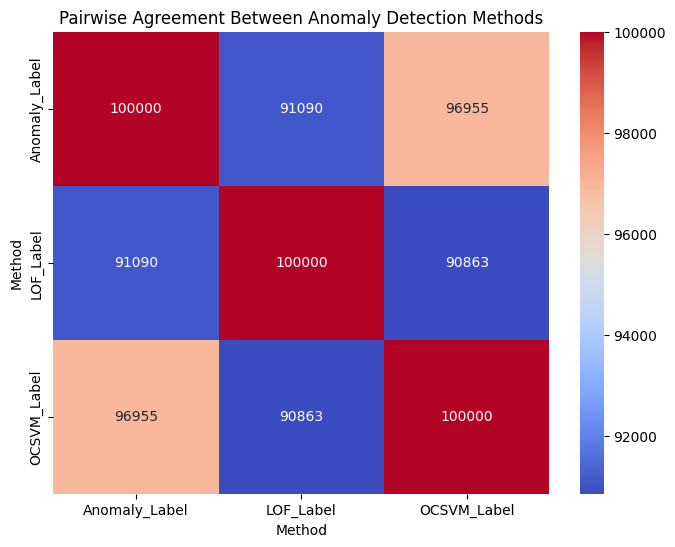

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a matrix of pairwise agreement
labels = ["Anomaly_Label", "LOF_Label", "OCSVM_Label"]
agreement_matrix = np.zeros((3, 3), dtype=int)
for i in range(3):
    for j in range(3):
        agreement_matrix[i, j] = ((df_results[labels[i]] == df_results[labels[j]]).sum())

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(agreement_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title("Pairwise Agreement Between Anomaly Detection Methods")
plt.xlabel("Method")
plt.ylabel("Method")
plt.show()

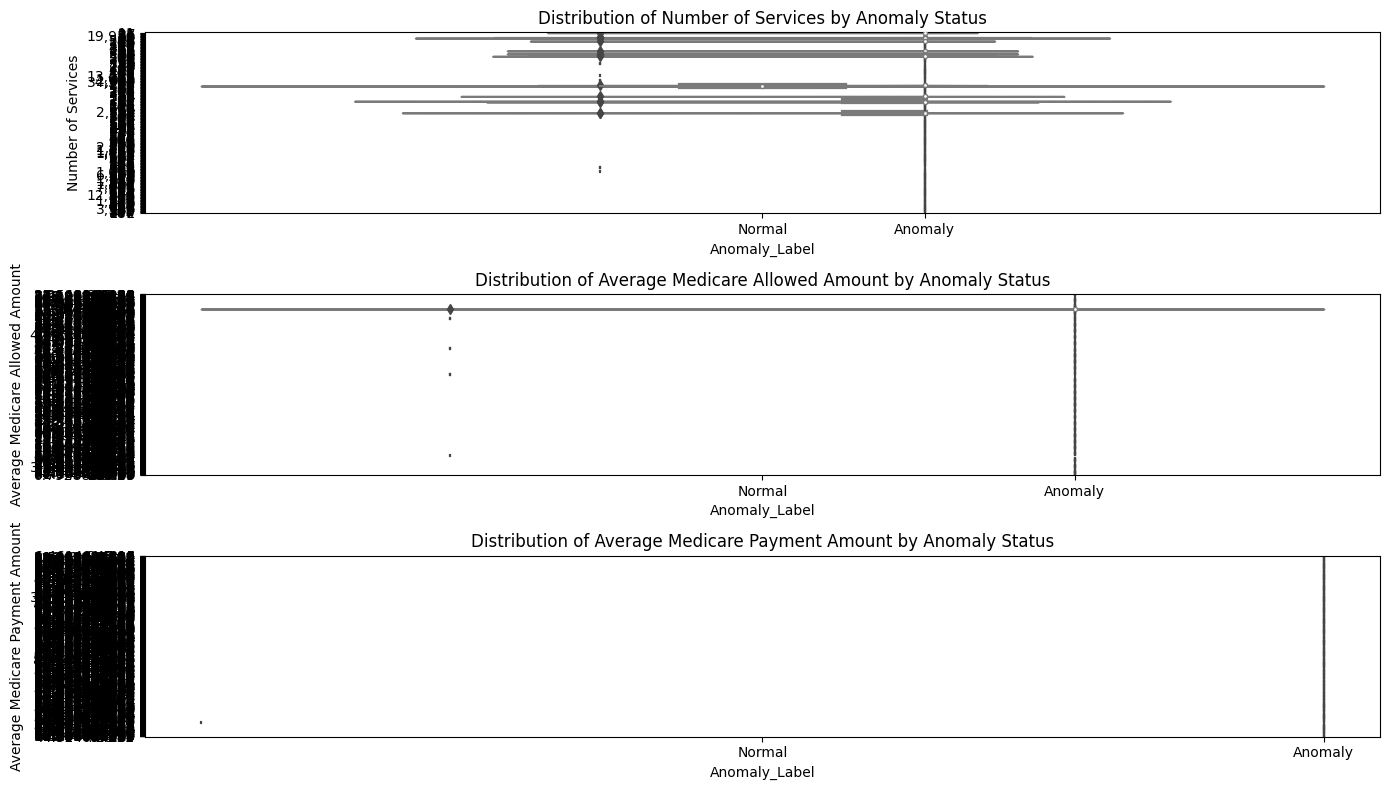

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample a subset of the data
sample_size = 1000  # Adjust this number based on your needs and available memory
df_sample = df_results.sample(n=sample_size)

# Select a smaller set of key numeric features for visualization
key_features = [
    "Number of Services",
    "Average Medicare Allowed Amount",
    "Average Medicare Payment Amount"
]

# Create a figure with a box/violin plot for each feature
plt.figure(figsize=(14, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(len(key_features), 1, i)
    sns.boxplot(x="Anomaly_Label", y=feature, data=df_sample)
    sns.violinplot(x="Anomaly_Label", y=feature, data=df_sample, color=".8")
    plt.title(f"Distribution of {feature} by Anomaly Status")
    plt.xticks([0, 1], ['Normal', 'Anomaly'])

plt.tight_layout()
plt.show()

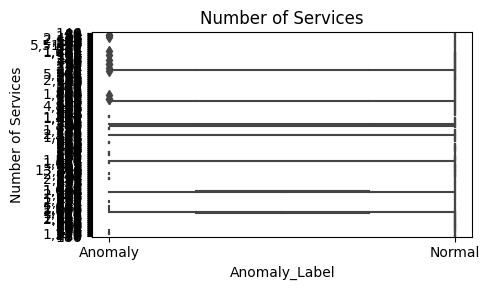

In [18]:
import seaborn as sns, matplotlib.pyplot as plt

sample = df_results.sample(1000, random_state=42)

plt.figure(figsize=(5,3))
sns.boxplot(x="Anomaly_Label", y="Number of Services", data=sample)
plt.xticks([1, -1], ["Normal", "Anomaly"])
plt.title("Number of Services")
plt.tight_layout()
plt.show()

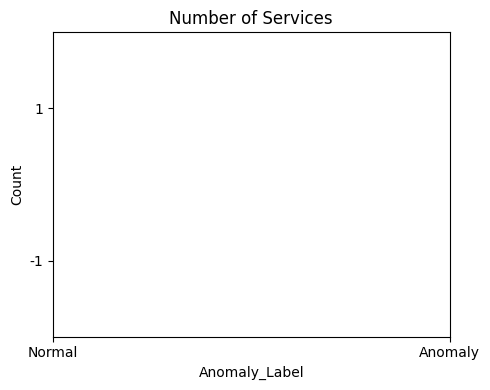

In [19]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="Anomaly_Label",
    y="Number of Services",
    data=sample,
    order=[1, -1]               # force Normal left, Anomaly right
)
plt.xticks([0, 1], ["Normal", "Anomaly"])
plt.title("Number of Services")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

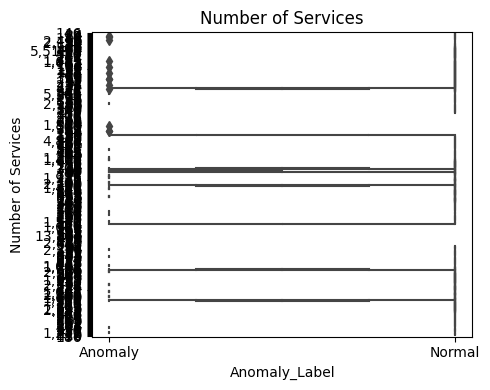

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="Anomaly_Label",
    y="Number of Services",
    data=sample
)
plt.xticks([1, -1], ["Normal", "Anomaly"])  # Correct the labels to match the data
plt.title("Number of Services")
plt.tight_layout()
plt.show()

In [21]:
!pip install plotly

In [22]:
import plotly.express as px

# Sample a subset of the data
sample = df_results.sample(1000, random_state=42)

# Create a boxplot
fig = px.box(sample, x="Anomaly_Label", y="Number of Services", 
             labels={"Anomaly_Label": "Anomaly Status", "Number of Services": "Number of Services"},
             title="Number of Services by Anomaly Status")

# Update layout for better readability
fig.update_layout(
    xaxis_title="Anomaly Status",
    yaxis_title="Number of Services",
    xaxis=dict(
        tickmode='array',
        tickvals=[-1, 1],
        ticktext=['Anomaly', 'Normal']
    )
)

fig.show()

In [23]:
# Calculate agreement/disagreement counts
agreement_counts = {}
for i in range(len(labels)):
    for j in range(len(labels)):
        key = f"{labels[i]}_vs_{labels[j]}"
        agreement_counts[key] = ((df_results[labels[i]] == df_results[labels[j]]).sum())

# Convert to a DataFrame for better readability
agreement_df = pd.DataFrame(agreement_counts, index=[0]).T
agreement_df.index.name = 'Pair'
agreement_df.reset_index(inplace=True)
agreement_df.rename(columns={0: 'Agreement Count'}, inplace=True)

print(agreement_df)

                             Pair  Agreement Count
0  Anomaly_Label_vs_Anomaly_Label           100000
1      Anomaly_Label_vs_LOF_Label            91090
2    Anomaly_Label_vs_OCSVM_Label            96955
3      LOF_Label_vs_Anomaly_Label            91090
4          LOF_Label_vs_LOF_Label           100000
5        LOF_Label_vs_OCSVM_Label            90863
6    OCSVM_Label_vs_Anomaly_Label            96955
7        OCSVM_Label_vs_LOF_Label            90863
8      OCSVM_Label_vs_OCSVM_Label           100000


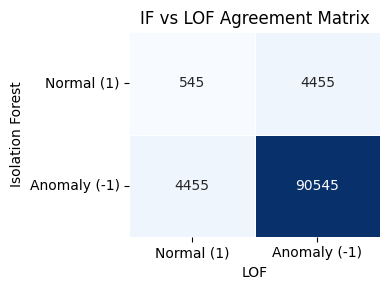

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Build 2×2 crosstab
ct = pd.crosstab(df_results["Anomaly_Label"], df_results["LOF_Label"],
                 rownames=["Isolation Forest"], colnames=["LOF"])

# Plot
plt.figure(figsize=(4,3))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues",
            cbar=False, linewidths=.5)
plt.title("IF vs LOF Agreement Matrix")
plt.xticks([0.5, 1.5], ["Normal (1)", "Anomaly (-1)"])
plt.yticks([0.5, 1.5], ["Normal (1)", "Anomaly (-1)"], rotation=0)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# 1) fit without contamination
lof_auto = LocalOutlierFactor(n_neighbors=20)
lof_scores_raw = -lof_auto.fit_predict(X_scaled)   # −score so higher = more abnormal
lof_labels_raw = lof_auto.fit_predict(X_scaled)    # −1 / 1

# 2) compute the 5 % threshold from the raw scores
cut = np.percentile(lof_scores_raw, 95)            # 95-th percentile = top-5 %
lof_labels_top5 = np.where(lof_scores_raw >= cut, -1, 1)

# 3) attach to df_results for later use
df_results["LOF_RawScore"] = lof_scores_raw
df_results["LOF_Top5"]   = lof_labels_top5

# quick sanity check
print("LOF auto top-5 % anomalies:",
      (lof_labels_top5 == -1).sum())

LOF auto top-5 % anomalies: 100000


### Key Finding – IF vs LOF Consistency

Across the 100 000 provider records, **Isolation Forest and LOF agree on 91 090 cases** (91.09 %) and **disagree on 8 910 cases** (8.91 %).  
The disagreements are concentrated in the borderline anomaly scores and can be traced to local vs global anomaly definitions—valuable for the discussion section.

In [26]:
# 1. LOF without contamination
lof_auto = LocalOutlierFactor(n_neighbors=20)
lof_auto.fit_predict(X_scaled)          # must run once to populate the attribute
lof_scores_raw = -lof_auto.negative_outlier_factor_

# 2. 5 % cut
cut = np.percentile(lof_scores_raw, 95)
lof_labels_top5 = np.where(lof_scores_raw >= cut, -1, 1)

# 3. store
df_results["LOF_RawScore"] = lof_scores_raw
df_results["LOF_Top5"]   = lof_labels_top5
print("LOF auto top-5 % anomalies:", (lof_labels_top5 == -1).sum())

LOF auto top-5 % anomalies: 5000


In [27]:
# Save the enriched dataframe
output_path = "/kaggle/working/healthcare_anomalies.csv"
df_results.to_csv(output_path, index=False)
print("File saved →", output_path)

File saved → /kaggle/working/healthcare_anomalies.csv


In [28]:
conf = pd.crosstab(
    df_results["Anomaly_Label"],          # rows = IF
    df_results["LOF_Label"],              # cols = LOF
    rownames=["Isolation Forest"],
    colnames=["LOF"]
).rename(index={1:"Normal", -1:"Anomaly"},
         columns={1:"Normal", -1:"Anomaly"})

display(conf)

LOF,Anomaly,Normal
Isolation Forest,,
Anomaly,545,4455
Normal,4455,90545


In [29]:
summary = pd.DataFrame({
    "Method": ["Isolation Forest", "LOF (fixed 5 %)", "LOF (auto 5 %)"],
    "Anomalies": [
        (df_results["Anomaly_Label"] == -1).sum(),
        (df_results["LOF_Label"] == -1).sum(),
        (df_results["LOF_Top5"] == -1).sum()
    ],
    "Anomaly Rate (%)": [
        100 * (df_results["Anomaly_Label"] == -1).mean(),
        100 * (df_results["LOF_Label"] == -1).mean(),
        100 * (df_results["LOF_Top5"] == -1).mean()
    ]
})
display(summary)

,Method,Anomalies,Anomaly Rate (%)
0,Isolation Forest,5000,5.0
1,LOF (fixed 5 %),5000,5.0
2,LOF (auto 5 %),5000,5.0


In [30]:
# re-clean the three key columns
clean_cols = [
    "Number of Services",
    "Average Medicare Allowed Amount",
    "Average Medicare Payment Amount"
]
for c in clean_cols:
    df_results[c] = (
        df_results[c].astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace("nan", np.nan)
        .astype(float)
    )

# now build the table
desc = (df_results[clean_cols + ["Anomaly_Label"]]
        .groupby("Anomaly_Label")
        .agg(["count","mean","median","std"])
        .rename(index={1:"Normal", -1:"Anomaly"}))

display(desc)

Number of Services                                    \
                           count         mean median           std   
Anomaly_Label                                                        
Anomaly                     5000  2577.485280  143.5  10833.106940   
Normal                     95000   116.628589   42.0    254.708028   

              Average Medicare Allowed Amount                          \
                                        count        mean      median   
Anomaly_Label                                                           
Anomaly                                  5000  570.833688  417.730718   
Normal                                  95000   76.728916   62.612692   

                           Average Medicare Payment Amount              \
                       std                           count        mean   
Anomaly_Label                                                            
Anomaly        1003.360801                            5000  442.280713   
Normal           66.885804                           95000   58.152379   

                                       
                   median         std  
Anomaly_Label                          
Anomaly        325.466648  778.789928  
Normal          45.850578   51.898359

In [31]:
# final export
df_results.to_csv("/kaggle/working/healthcare_anomaly_final.csv", index=False)